<a href="https://colab.research.google.com/github/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/ML/treinamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 1) Resumo

Neste notebook foram feitos os treinamentos e seleção de hyperparamentros de 6 modelos de **ML** distintos. Os modelos estudados foram:

* DummyClassifier
* LogisticRegression
* DecisionTreeClassifier
* Forest Tree
* Support Vector Machine
* KNeighbors

A busca pelos hyperparametros foram feitas pelo GridSearchCV ou pelo RandomizedSearchCV. Para a Cross Validation foi usado **RepeatedStratifiedKFold** com **5** divições de **10** repetições.

O parametro utilizado para avaliação do modelo foi **ROC_AUC** e quantidade de **falsos negativos** (FN).

A base de dados utilizados tem **351** amostras com **52** variaveis explicativas. Dessas **351** amostras **298** foram usados para **Cross Validation** (treino + teste) e **53** foram usados para a **validação**.


---
# 2) Pre-analise

---
## 2.1) Minhas Funções

In [1]:
# Maquina Local 
if (True):
    import sys
    sys.path.insert(1, "../../")

    from src.plota_graficos import plota_curva_roc, plota_matriz_de_confusao
    from src.ml import retorna_x_y, intervalo_de_confianca, treina_modelo_grid_search_cv, treina,\
                        treina_modelo_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split, desempenho_dos_modelos 

    from src.info import proporcao_y, numero_teste_treino_val, resultados_treinamento, dimensao_dados, variaveis_explicativas

# Collab
else:
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/requirements.txt"
   !pip3 install -r requirements.txt
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/plota_graficos.py"
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/ml.py"
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/info.py"

   from plota_graficos import plota_curva_roc, plota_matriz_de_confusao
   from ml import retorna_x_y, intervalo_de_confianca, treina_modelo_grid_search_cv, treina, \
                  treina_modelo_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split, desempenho_dos_modelos

   from info import proporcao_y, numero_teste_treino_val, resultados_treinamento, dimensao_dados, variaveis_explicativas

---
## 2.2) Importando libs

In [2]:
import pandas as pd
#
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#
import matplotlib.pyplot as plt
#
import numpy as np
#
from scipy.stats import uniform
#
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
#


## 2.3) Versão dos bibilotecas

In [3]:
import sklearn as sk
import scipy   as sc
import matplotlib as mpl

print(f'scipy      : {sc.__version__}')
print(f'sklearn    : {sk.__version__}')
print(f'pandas     : {pd.__version__}')
print(f'numpy      : {np.__version__}')
print(f'matplotlib : {mpl.__version__}')

scipy      : 1.6.2
sklearn    : 0.24.2
pandas     : 1.2.4
numpy      : 1.20.2
matplotlib : 3.3.4


---
# 3) Lendo os dados

In [4]:
path = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/Dados/Tratados/dados_sem_coor_acima_do_valor_de_corte.csv"

dados_com_corte = pd.read_csv(path)

dimensao_dados(dados_com_corte)

dados_com_corte.tail(n=5)

Numero de linhas : 351 
Numero de colunas: 53 


,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,ICU
346,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.860241,-0.978029,-0.160494,-0.692308,0.339623,-0.457627,0.142857,0.736842,-0.418803,1
347,1,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.855422,-0.978029,-0.407407,-0.692308,-0.283019,-0.457627,-0.059524,0.526316,-0.589744,0
348,0,-0.111111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.787952,-0.964461,0.012346,-0.384615,-0.320755,-0.457627,-0.071429,0.894737,-0.299145,1
349,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.937349,-0.978029,0.086420,-0.230769,-0.301887,-0.661017,-0.107143,0.736842,-0.247863,0
350,0,-0.111111,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.879518,-0.979571,0.012346,-0.292308,0.056604,-0.525424,0.535714,0.789474,-0.299145,0


In [5]:
dados_com_corte.describe()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,ICU
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.458689,-0.046534,0.381766,0.108262,0.022792,0.091168,0.019943,0.128205,0.045584,0.196581,...,-0.841746,-0.960159,-0.045990,-0.318411,-0.240403,-0.468207,0.097772,0.760029,-0.313074,0.461538
std,0.499002,0.640366,0.486513,0.311155,0.149453,0.288259,0.140004,0.334795,0.208879,0.397980,...,0.135197,0.098682,0.253692,0.274796,0.278347,0.213326,0.272230,0.116880,0.185592,0.499230
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.971084,-1.000000,-0.654321,-0.938462,-0.823899,-0.954802,-0.571429,0.263158,-0.760684,0.000000
25%,0.000000,-0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.898795,-0.983811,-0.185185,-0.538462,-0.415094,-0.593220,-0.107143,0.684211,-0.418803,0.000000
50%,0.000000,-0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.874699,-0.978029,-0.037037,-0.369231,-0.283019,-0.525424,0.071429,0.789474,-0.299145,0.000000
75%,1.000000,0.555556,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.821687,-0.971784,0.086420,-0.153846,-0.094340,-0.389831,0.250000,0.842105,-0.213675,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.513241,0.604938,0.553846,1.000000,0.830508,0.964286,1.000000,0.487179,1.000000


In [6]:
_ = variaveis_explicativas(dados_com_corte)

 col[  0] -> AGE_ABOVE65                    col[  1] -> AGE_PERCENTIL                  
 col[  2] -> GENDER                         col[  3] -> DISEASE GROUPING 1             
 col[  4] -> DISEASE GROUPING 2             col[  5] -> DISEASE GROUPING 3             
 col[  6] -> DISEASE GROUPING 4             col[  7] -> DISEASE GROUPING 5             
 col[  8] -> DISEASE GROUPING 6             col[  9] -> HTN                            
 col[ 10] -> IMMUNOCOMPROMISED              col[ 11] -> OTHER                          
 col[ 12] -> ALBUMIN_MEDIAN                 col[ 13] -> BE_ARTERIAL_MEDIAN             
 col[ 14] -> BE_VENOUS_MEDIAN               col[ 15] -> BIC_VENOUS_MEDIAN              
 col[ 16] -> BILLIRUBIN_MEDIAN              col[ 17] -> BLAST_MEDIAN                   
 col[ 18] -> CALCIUM_MEDIAN                 col[ 19] -> CREATININ_MEDIAN               
 col[ 20] -> FFA_MEDIAN                     col[ 21] -> GGT_MEDIAN                     
 col[ 22] -> GLUCOSE_MEDIAN     

### Divindido os dados em validação e Cross Valadiation (teste+treino)

In [7]:
rng = RandomState(MT19937(SeedSequence(14715)))
x_cv, x_val, y_cv, y_val = cv_val_split(dados_com_corte, p_val = .10, rng=rng)

### Verificando se a proporção foi mantida 

In [8]:
proporcao_y(dados_com_corte['ICU'])
proporcao_y(y_val)
proporcao_y(y_cv )

Proporcao do ICU
Campo 0 ->  53.85%
Campo 1 ->  46.15%
Proporcao do ICU
Campo 0 ->  52.78%
Campo 1 ->  47.22%
Proporcao do ICU
Campo 0 ->  53.97%
Campo 1 ->  46.03%


In [9]:
numero_teste_treino_val(dados_com_corte['ICU'], y_val, y_cv)

Número total de entradas                         : 351
Número total de entradas para validacao          : 36
Número total de entradas para o Cross Validation : 315


# 4) Modelo de ML

A opção **refit** foi deixado como **true** logo depois que o melhor modelo for selecioando o RandomizedSearchCV/GridSearchCv **re-treina** esse modelo com o dataset completo (treino+teste). 

In [21]:
n_iter   = 25
n_splits = 5
n_repeats= 10
seed     = 14715

## 4.1) DummyClassifier

> Aqui será treinado do modelo **DummyClassifier**. Para o treino foi usado **GridSearchCV**. O único hyperparametro disponivel foi **strategy**. O intervalor de busca  **[stratified, 'ost_frequent, prior, 'uniform]**. O DummyClassifier será usado como o nosso modelo **"baseline"**



In [22]:
rng = RandomState(MT19937(SeedSequence(seed)))

modelo = DummyClassifier(random_state=rng)

parameters = {'strategy' : ['stratified', 'most_frequent', 'prior', 'uniform']}

resultados, melhor_modelo_dummy, melhores_hyperparametros  = treina_modelo_grid_search_cv(modelo,
                                                                                      x_cv,
                                                                                      y_cv,
                                                                                      parameters,
                                                                                      n_splits=n_splits,
                                                                                      n_repeats=n_repeats,
                                                                                      rng=rng)

resultados_treinamento(resultados, melhor_modelo_dummy, melhores_hyperparametros)

Fitting 50 folds for each of 4 candidates, totalling 200 fits
melhores hyperparametros : {'strategy': 'most_frequent'}
Melhor modelo            : DummyClassifier(random_state=RandomState(MT19937) at 0x2C869927340,
                strategy='most_frequent')


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'strategy': 'stratified'},0.467738,0.499703,0.057081,0.027514,0.002059,0.001120,0.002878,0.001436,4
1,{'strategy': 'most_frequent'},0.500000,0.500000,0.000000,0.000000,0.002399,0.001696,0.002938,0.002042,1
2,{'strategy': 'prior'},0.500000,0.500000,0.000000,0.000000,0.001879,0.001012,0.002478,0.000806,1
3,{'strategy': 'uniform'},0.500000,0.500000,0.000000,0.000000,0.001819,0.000931,0.002139,0.000490,1


---
## 4.2) Regreção logistica

> Aqui será treinado do modelo **LogisticRegression**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros foram:
>* C             : [0, 4]


Fitting 50 folds for each of 25 candidates, totalling 1250 fits


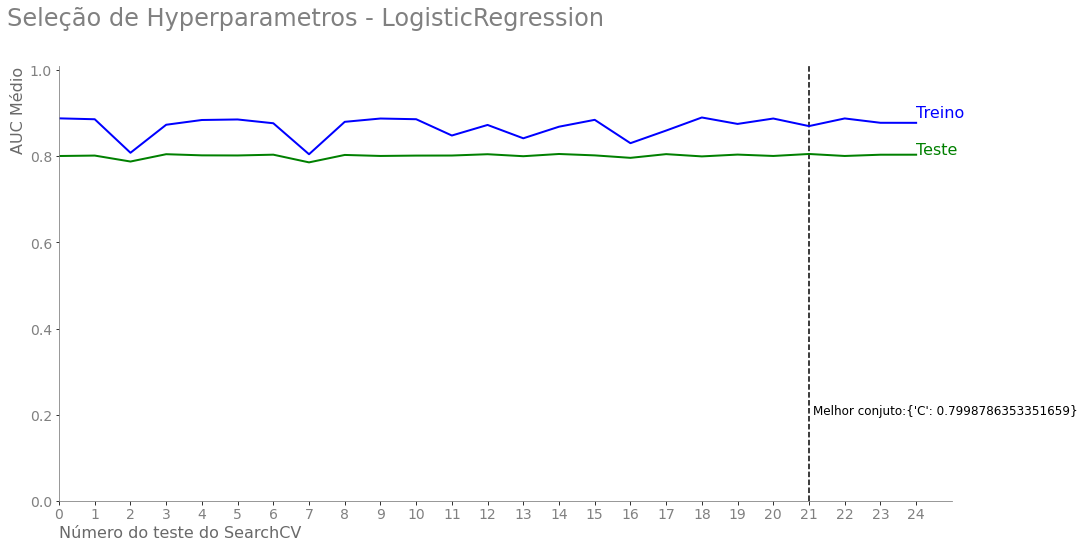

melhores hyperparametros : {'C': 0.7998786353351659}
Melhor modelo            : LogisticRegression(C=0.7998786353351659, max_iter=1000, tol=1e-06)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'C': 3.1503980054311658},0.800771,0.888228,0.054237,0.009637,0.058144,0.007866,0.005736,0.001016,20
1,{'C': 2.6361182255964937},0.801785,0.886140,0.053587,0.009567,0.055057,0.018730,0.005997,0.001821,15
2,{'C': 0.017676648379870485},0.787951,0.808282,0.048928,0.009770,0.013121,0.001104,0.005499,0.000754,24
3,{'C': 0.9980065327467735},0.804970,0.873366,0.051727,0.009681,0.032310,0.003514,0.005519,0.000842,4
4,{'C': 2.2919964239166704},0.802292,0.884422,0.052797,0.009615,0.047627,0.005235,0.005464,0.000669,11
5,{'C': 2.5184487507316655},0.802028,0.885639,0.053234,0.009522,0.050358,0.007441,0.005449,0.000750,13
6,{'C': 1.2743916518112473},0.803854,0.876851,0.052194,0.009606,0.036143,0.005940,0.005598,0.000865,7
7,{'C': 0.011930897600825663},0.785984,0.804878,0.048812,0.009763,0.016397,0.009396,0.005910,0.001265,25
8,{'C': 1.6396579001915375},0.803245,0.880147,0.052698,0.009542,0.040641,0.004856,0.005671,0.000874,10
9,{'C': 3.0397398776997298},0.800913,0.887822,0.054189,0.009627,0.055699,0.008709,0.005500,0.000781,17


In [23]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'C': uniform(loc=0, scale=4)}
modelo = LogisticRegression(max_iter=1000, tol=1e-6)

melhor_modelo_lr, res = treina(modelo = modelo,
                        x = x_cv, 
                        y = y_cv, 
                        parameters = parameters, 
                        n_splits = n_splits, 
                        n_repeats = n_repeats, 
                        n_iter = n_iter, 
                        titulo = 'Seleção de Hyperparametros - LogisticRegression',
                        n = 10,
                        rng=rng)

res

---
## 4.3) Arvore de decissão

> Aqui será treinado do modelo **DecisionTreeClassifier**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros foram:
>* max_depth       : [1-20]
>* criterion       : [gini, entropy]
>* min_samples_leaf: [1-5]
>* max_leaf_nodes  : [2-5]


Fitting 50 folds for each of 25 candidates, totalling 1250 fits


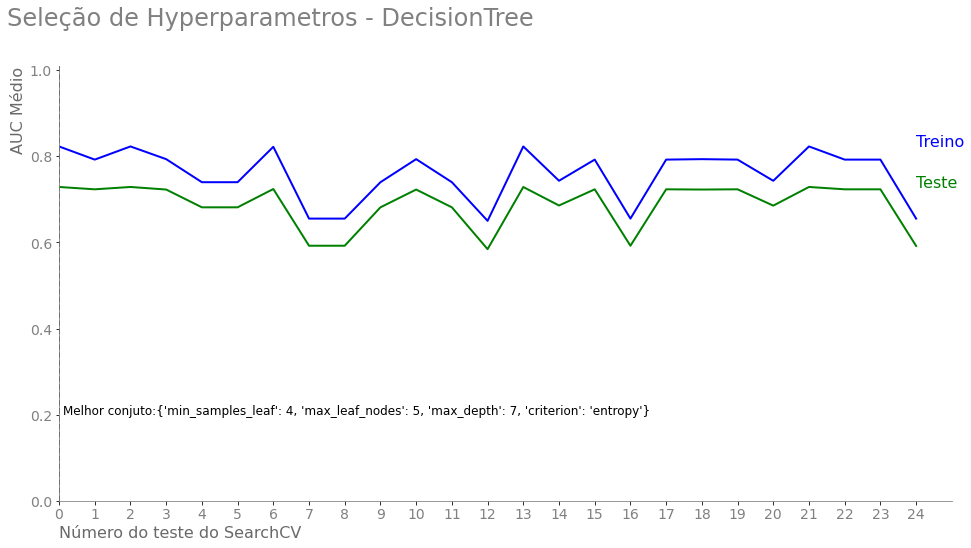

melhores hyperparametros : {'min_samples_leaf': 4, 'max_leaf_nodes': 5, 'max_depth': 7, 'criterion': 'entropy'}
Melhor modelo            : DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=5,
                       min_samples_leaf=4)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'min_samples_leaf': 4, 'max_leaf_nodes': 5, '...",0.728864,0.822984,0.054930,0.015640,0.009534,0.002358,0.006098,0.001219,1
1,"{'min_samples_leaf': 3, 'max_leaf_nodes': 4, '...",0.723418,0.792409,0.055005,0.015868,0.008924,0.001029,0.006137,0.001248,6
2,"{'min_samples_leaf': 3, 'max_leaf_nodes': 5, '...",0.728864,0.822984,0.054930,0.015640,0.009287,0.001311,0.005827,0.000903,1
3,"{'min_samples_leaf': 3, 'max_leaf_nodes': 4, '...",0.722901,0.793474,0.053398,0.012555,0.007397,0.001076,0.005737,0.001035,12
4,"{'min_samples_leaf': 1, 'max_leaf_nodes': 3, '...",0.681613,0.739939,0.054523,0.013923,0.008504,0.001021,0.005748,0.001148,17
5,"{'min_samples_leaf': 1, 'max_leaf_nodes': 3, '...",0.681613,0.739939,0.054523,0.013923,0.008295,0.001135,0.005922,0.001321,17
6,"{'min_samples_leaf': 3, 'max_leaf_nodes': 5, '...",0.724108,0.822172,0.062874,0.014029,0.007777,0.000898,0.005716,0.000800,5
7,"{'min_samples_leaf': 5, 'max_leaf_nodes': 2, '...",0.592404,0.655413,0.043648,0.019087,0.006526,0.001030,0.005539,0.000753,21
8,"{'min_samples_leaf': 1, 'max_leaf_nodes': 2, '...",0.592404,0.655413,0.043648,0.019087,0.006706,0.001384,0.006396,0.004879,21
9,"{'min_samples_leaf': 1, 'max_leaf_nodes': 3, '...",0.681613,0.739939,0.054523,0.013923,0.008295,0.000877,0.005849,0.000916,17


In [24]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'max_depth'       : np.arange(1, 21),
              'criterion'       : ['gini', 'entropy'],
              'min_samples_leaf': np.arange(1, 6),
              'max_leaf_nodes'  : np.arange(2, 6)
             }
modelo = DecisionTreeClassifier()

melhor_modelo_arvore, res = treina(modelo = modelo,
                            x = x_cv, 
                            y = y_cv, 
                            parameters = parameters, 
                            n_splits = n_splits, 
                            n_repeats = n_repeats, 
                            n_iter = n_iter, 
                            titulo = 'Seleção de Hyperparametros - DecisionTree',
                            n = 10,
                            rng=rng)

res

---
## 4.4) Forest Tree

> Aqui será treinado do modelo **Forest Tree**. No treino foi usado **RandomizedSearchCV** com **10** iterações. Os hyperparametros foram:
>* n_estimators    : [10, 50, 100, 150, 200]
>* max_depth       : [1, 20]    
>* criterion       : [gini, entropy]
>* min_samples_leaf: [1-5]
>* max_leaf_nodes  : [2-5]


Fitting 50 folds for each of 25 candidates, totalling 1250 fits


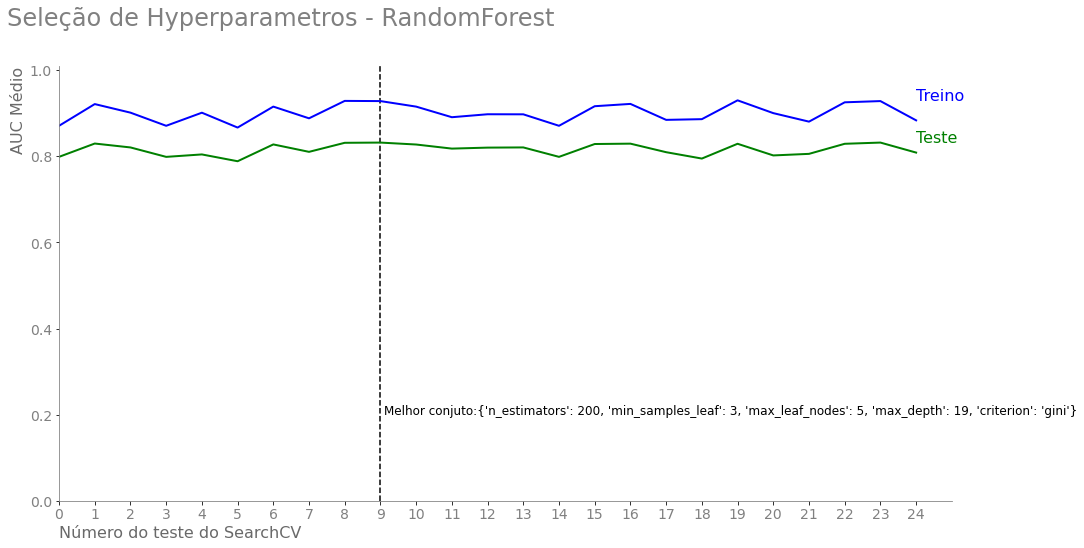

melhores hyperparametros : {'n_estimators': 200, 'min_samples_leaf': 3, 'max_leaf_nodes': 5, 'max_depth': 19, 'criterion': 'gini'}
Melhor modelo            : RandomForestClassifier(max_depth=19, max_leaf_nodes=5, min_samples_leaf=3,
                       n_estimators=200,
                       random_state=RandomState(MT19937) at 0x2C869927240)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'n_estimators': 50, 'min_samples_leaf': 3, 'm...",0.798813,0.870942,0.055861,0.011569,0.141372,0.012162,0.017248,0.003790,21
1,"{'n_estimators': 50, 'min_samples_leaf': 3, 'm...",0.829736,0.921384,0.047376,0.007224,0.138018,0.014644,0.017295,0.006278,4
2,"{'n_estimators': 100, 'min_samples_leaf': 4, '...",0.820669,0.901469,0.050443,0.008420,0.265616,0.005601,0.025372,0.001580,12
3,"{'n_estimators': 50, 'min_samples_leaf': 4, 'm...",0.798773,0.870951,0.055889,0.011578,0.132570,0.006625,0.015873,0.001052,23
4,"{'n_estimators': 10, 'min_samples_leaf': 1, 'm...",0.804432,0.901350,0.058240,0.012603,0.034715,0.003343,0.009594,0.004120,19
5,"{'n_estimators': 10, 'min_samples_leaf': 2, 'm...",0.788621,0.866829,0.061915,0.015880,0.035929,0.010420,0.009175,0.002196,25
6,"{'n_estimators': 150, 'min_samples_leaf': 2, '...",0.827667,0.915515,0.048258,0.008076,0.464564,0.097459,0.042209,0.012516,9
7,"{'n_estimators': 200, 'min_samples_leaf': 4, '...",0.810436,0.888306,0.051806,0.010177,0.529127,0.024402,0.046812,0.004816,15
8,"{'n_estimators': 200, 'min_samples_leaf': 1, '...",0.831440,0.928766,0.046945,0.006358,0.547678,0.035217,0.047480,0.004087,3
9,"{'n_estimators': 200, 'min_samples_leaf': 3, '...",0.831968,0.928330,0.046927,0.006233,0.545014,0.029433,0.047988,0.006492,1


In [25]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'n_estimators'    : [10, 50, 100, 150, 200],
              'max_depth'       : np.arange(1, 21),
              'criterion'       : ['gini', 'entropy'],
              'min_samples_leaf': np.arange(1, 6),
              'max_leaf_nodes'  : np.arange(2, 6)
             }
modelo = RandomForestClassifier(random_state=rng)

melhor_modelo_forest, res = treina(modelo = modelo,
                              x = x_cv, 
                              y = y_cv, 
                              parameters = parameters, 
                              n_splits = n_splits, 
                              n_repeats = n_repeats, 
                              n_iter = n_iter, 
                              titulo = 'Seleção de Hyperparametros - RandomForest',
                              n = 10,
                              rng=rng)

res

> 

## 4.5) Support Vector Classification.

> Aqui será treinado do modelo **SVC**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros de busca foram
>* kernel        : [linear, poly, rbf, sigmoid]
>* C             : [0, 2]
>* gamma         : [scale, auto]
>* shrinking     : [True , False]

Fitting 50 folds for each of 25 candidates, totalling 1250 fits


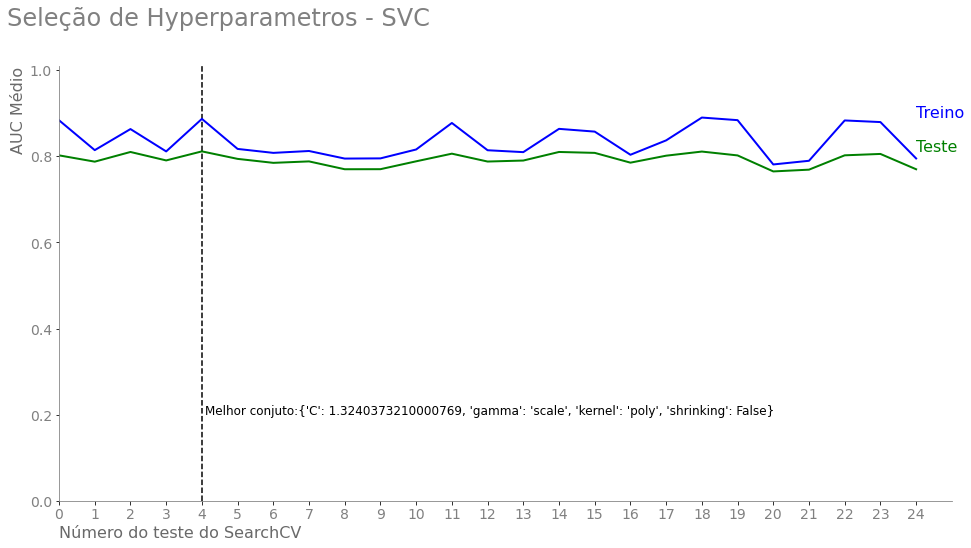

melhores hyperparametros : {'C': 1.3240373210000769, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': False}
Melhor modelo            : SVC(C=1.3240373210000769, kernel='poly', probability=True, shrinking=False)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'C': 1.5751990027155829, 'gamma': 'scale', 'k...",0.802272,0.883769,0.045027,0.010179,0.043845,0.007540,0.008055,0.004261,9
1,"{'C': 1.7921005524620657, 'gamma': 'auto', 'ke...",0.787647,0.814412,0.049400,0.009973,0.037744,0.004215,0.007630,0.001309,18
2,"{'C': 1.2592243753658328, 'gamma': 'scale', 'k...",0.810142,0.863346,0.046480,0.008972,0.040332,0.001643,0.009144,0.000862,4
3,"{'C': 0.9844917418049941, 'gamma': 'auto', 'ke...",0.790507,0.811430,0.049894,0.010346,0.032880,0.004802,0.008114,0.001806,13
4,"{'C': 1.3240373210000769, 'gamma': 'scale', 'k...",0.811542,0.887003,0.045228,0.008887,0.029204,0.005580,0.007329,0.001936,1
5,"{'C': 1.4610068952819986, 'gamma': 'auto', 'ke...",0.794118,0.817231,0.050112,0.010196,0.032717,0.003984,0.008055,0.004166,12
6,"{'C': 1.1816070316934664, 'gamma': 'auto', 'ke...",0.784888,0.808053,0.050558,0.010170,0.038249,0.002153,0.008715,0.008256,20
7,"{'C': 0.4605039796485637, 'gamma': 'auto', 'ke...",0.788256,0.812404,0.051090,0.010406,0.047725,0.002977,0.010120,0.001493,16
8,"{'C': 1.5204021843469244, 'gamma': 'scale', 'k...",0.770041,0.794824,0.050610,0.010209,0.045793,0.005908,0.008156,0.001803,22
9,"{'C': 1.5815954706796762, 'gamma': 'scale', 'k...",0.770162,0.795257,0.050360,0.010261,0.046026,0.004545,0.008241,0.001791,21


In [26]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'kernel'          : ['linear', 'poly', 'rbf', 'sigmoid'],
              'C'               : uniform(loc=0, scale=2),
              'gamma'           : ['scale', 'auto'],
              'shrinking'       : [True, False]
             }

modelo = SVC(probability=True)

melhor_modelo_svc, res = treina(modelo = modelo,
                              x = x_cv, 
                              y = y_cv, 
                              parameters = parameters, 
                              n_splits = n_splits, 
                              n_repeats = n_repeats, 
                              n_iter = n_iter, 
                              titulo = 'Seleção de Hyperparametros - SVC',
                              n = 10,
                              rng=rng)

res

## 4.5) KNeighbors

> Aqui será treinado do modelo **KNeighbor**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros de busca foram
>* n_neighbors   : [1, 10]
>* p             : [1, 2]
>* weights       : [uniform, distance]
>* algorithm     : [auto, ball_tree, kd_tree, brute]

Fitting 50 folds for each of 25 candidates, totalling 1250 fits


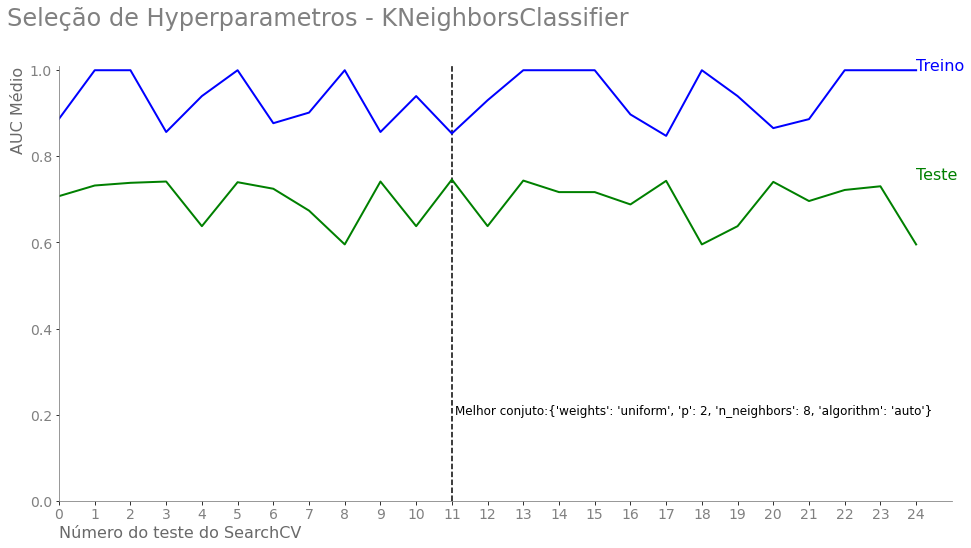

melhores hyperparametros : {'weights': 'uniform', 'p': 2, 'n_neighbors': 8, 'algorithm': 'auto'}
Melhor modelo            : KNeighborsClassifier(n_neighbors=8)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.707627,0.887226,0.051005,0.010097,0.007735,0.004500,0.010274,0.010810,15
1,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.732272,1.000000,0.049847,0.000000,0.007375,0.001278,0.010296,0.008397,9
2,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.738519,1.000000,0.049768,0.000000,0.007735,0.009444,0.009255,0.002761,8
3,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.741501,0.856526,0.052417,0.011509,0.005197,0.000999,0.007820,0.000839,4
4,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.637799,0.939954,0.048625,0.008087,0.005317,0.001103,0.007288,0.000917,20
5,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.739929,1.000000,0.051514,0.000000,0.009835,0.006024,0.011006,0.003537,7
6,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.724736,0.876983,0.051189,0.009570,0.005237,0.000884,0.007276,0.001077,11
7,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.673945,0.901572,0.044544,0.010053,0.008016,0.004385,0.009388,0.004728,18
8,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.595456,1.000000,0.047008,0.000000,0.006172,0.002010,0.008515,0.003411,23
9,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.741501,0.856526,0.052417,0.011509,0.007723,0.001660,0.010354,0.002363,4


In [27]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'n_neighbors'     : np.arange(1, 11),
              'p'               : [1, 2],
              'weights'         : ['uniform', 'distance'],
              'algorithm'       : ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

modelo = KNeighborsClassifier()

melhor_modelo_kn, res = treina(modelo = modelo,
                              x = x_cv, 
                              y = y_cv, 
                              parameters = parameters, 
                              n_splits = n_splits, 
                              n_repeats = n_repeats, 
                              n_iter = n_iter, 
                              titulo = 'Seleção de Hyperparametros - KNeighborsClassifier',
                              n = 10,
                              rng=rng)

res


# 5) Avaliando o melhor modelo

> Agora vamos avaliar o melhor modelo encontrado utilizando o dados de validação.

In [17]:
modelos = [melhor_modelo_dummy, 
           melhor_modelo_lr, 
           melhor_modelo_arvore, 
           melhor_modelo_forest, 
           melhor_modelo_svc,
           melhor_modelo_kn] 

In [30]:
desempenho_dos_modelos(modelos, x_val, y_val)

,Name,tn,fp,fn,tp,AUC
0,SVC,11,8,5,12,0.637771
1,DecisionTreeClassifier,13,6,8,9,0.605263
2,LogisticRegression,10,9,5,12,0.594427
3,KNeighborsClassifier,13,6,10,7,0.568111
4,RandomForestClassifier,10,9,8,9,0.563467
5,DummyClassifier,19,0,17,0,0.500000


> DataFrame com os resultados

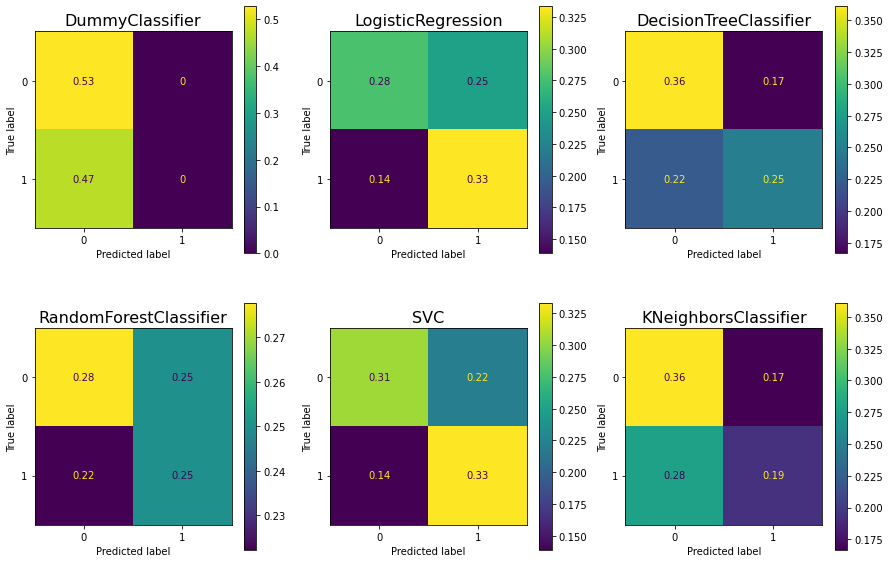

In [19]:
plota_matriz_de_confusao(modelos, x_val, y_val)

> A Matriz de confusão dos modelos. Os paramentro mais crítico para o nosso modelo é o **falso negativo** (FN).

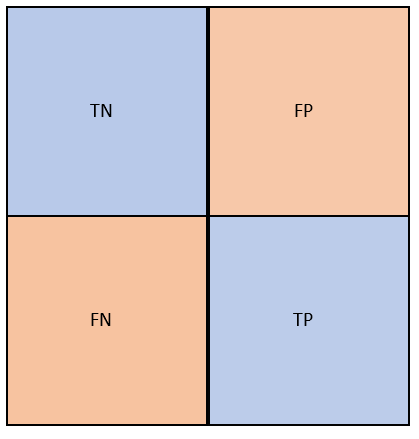

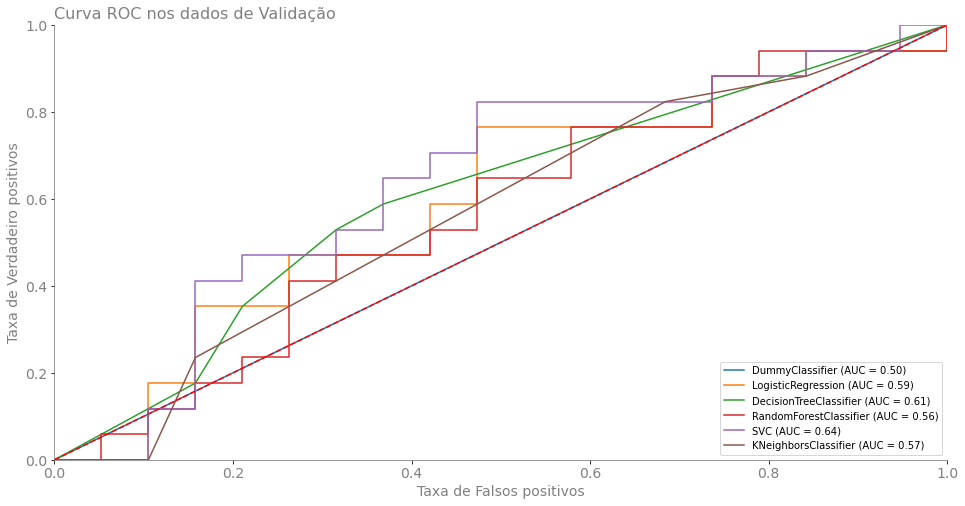

In [20]:
plota_curva_roc(modelos, titulo='Curva ROC nos dados de Validação', x=x_val, y=y_val)

> A curva ROC dos modelos para os dados de validação. No gráfico observa-se que DummyClassifier estão na diagonal do gráfico como esperado

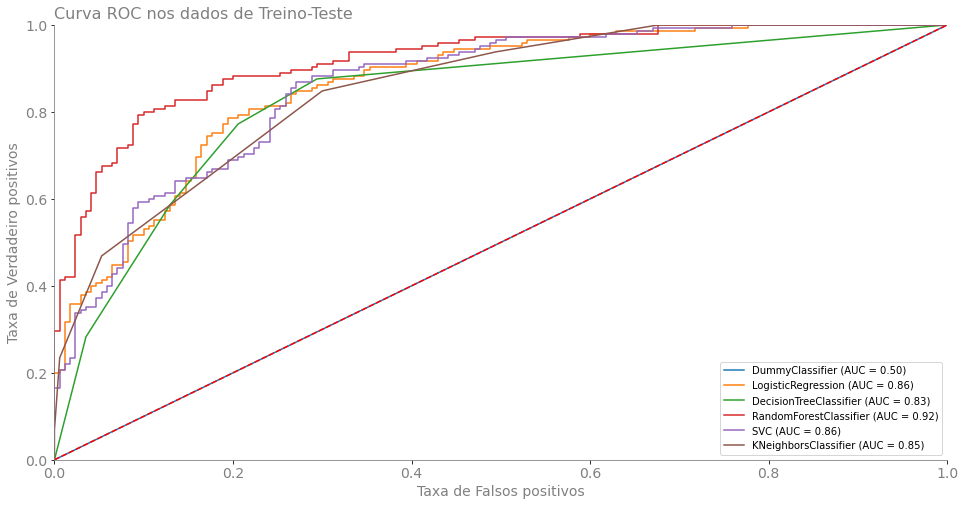

In [29]:
plota_curva_roc(modelos, titulo='Curva ROC nos dados de Treino-Teste', x=x_cv, y=y_cv)

> A curva ROC dos modelos para os dados usados na **Cross Validation** (teste+treino). Este gráfico não pode ser usado para avaliar o modelo pois o modelo final foi re-treina com todos os dados da **Cross Validation** depois que o melhor hyperparametro foi achado.  

# 6) Conclusão